# PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH

Ví dụ 1. (Xem bài giảng lý thuyết): Ước lượng áp suất khí quyển (tính theo atm) tại một địa điểm dựa trên
nhiệt độ sôi của nước (theo độ F) tại địa điểm đó.

Khởi tạo dữ liệu

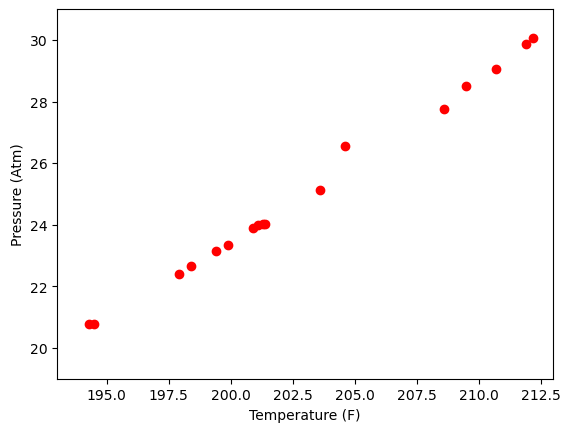

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


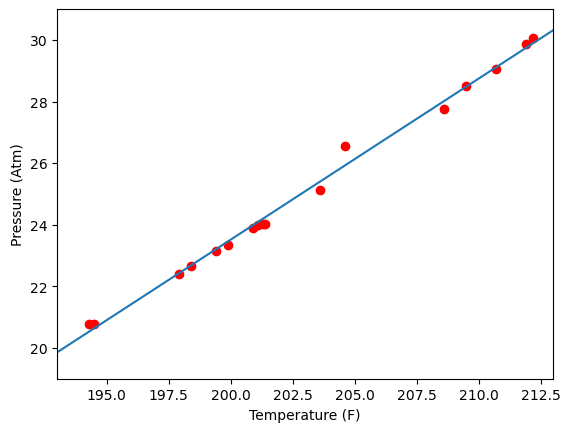

In [4]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

Ví dụ 2. (Xem bài giảng lý thuyết): Trong ví dụ này, ta sử dụng mô hình hồi quy tuyến tính để dự báo mức
độ tiêu thụ nhiên liệu trong 50 bang của Hoa Kỳ và quận Columbia và tìm hiểu hiệu ứng của tiêu thụ nhiên
liệu đối với thuế xăng của các bang.

Đọc dữ liệu từ tệp

In [5]:
import math
import numpy as np
with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

a) Sử dụng Numpy – Dùng thuật toán HoldHouse để khai triển QR

In [6]:
def qr_householder(A):
#""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
    # """

    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

Đoạn lệnh gọi và chạy chương trình

In [7]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457734307
                 Tax: -4.227983208329617
                Dlic: 0.47187121344197447
              Income: -0.006135330970417916
            LogMiles: 18.545274506048003


b) Trường hợp sử dụng thư viện Scikit-Learn

In [8]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

LinearRegression(fit_intercept=False)

Ví dụ 3 (Bài tập 1).

Trong tệp dữ liệu SAT_GPA.csv đính kèm có 84 mẫu dữ liệu điểm thi của các
sinh viên, mẫu có 02 trường dữ liệu, trong cột thứ nhất chứa trường điểm SAT (Reading +
Mathematic + Writing) của các kỳ thi trong bậc phổ thông; cột thứ hai chứa điểm trung bình GPA
của sinh viên tương ứng ở bậc học đại học/cao đẳng. Chúng ta xây dựng một mô hình hồi quy tuyến
tính để mô tả sự phụ thuộc của điểm GPA ở bậc đại học/cao đẳng vào điểm SAT của mỗi sinh viên
ở bậc phổ thông. Trong ví dụ này, chúng ta có thể sử dụng thư viện panda để đọc tệp csv, hoặc sử
dụng đoạn code đọc tệp văn bản như ví dụ trước.

Đoạn đọc dữ liệu từ tệp dạng csv

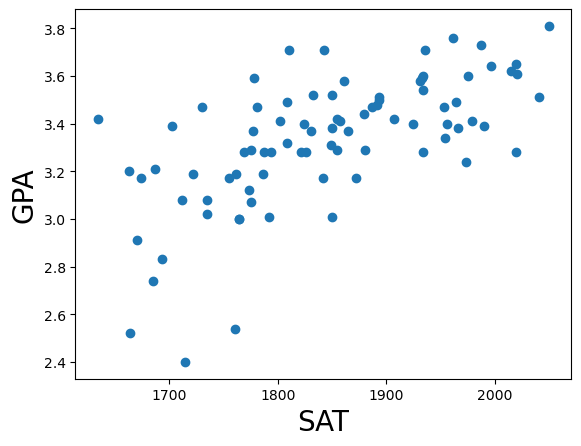

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Change to data path on your computer
data =pd.read_csv("SAT_GPA.csv")

# Show the description of data
data.describe()

# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Chia dữ liệu thành hai tập train, test và tiến hành huấn luyện mô hình.

In [7]:
y_train = data['GPA'][:60]
x_train = data['SAT'][:60]

y_train = y_train.values
x_train = x_train.values

x_train = x_train.reshape(-1, 1)


y_test = data['GPA'][60:]
x_test = data['SAT'][60:]

regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

Vẽ biểu đồ phân bố và đường hồi quy.

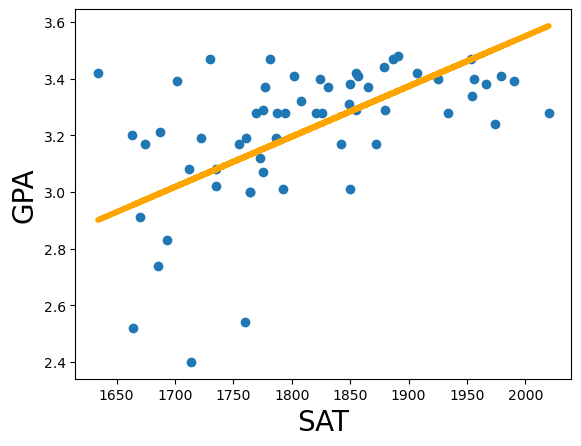

In [8]:
plt.scatter(x_train ,y_train)
yhat = regr.coef_*x_train + regr.intercept_
fig = plt.plot(x_train ,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Chạy thử mô hình và tính tổng bình phương sai số

In [9]:
x_test = x_test.values
x_test = x_test.reshape(-1, 1)

# y_test = y_test.values
# y_test = y_test.reshape(-1, 1)

y_pred = regr.predict(x_test)
print(y_pred)

# Tính SSE
sse = np.sum((y_test - y_pred) ** 2)

print(f'SSE: {sse}')


[3.48649062 3.20955959 3.3604515  3.62318094 3.3604515  3.25216437
 3.28411795 3.43323465 3.30364514 3.42790906 3.43145946 3.15630363
 3.50601781 3.43323465 3.58767696 3.57702576 3.54507218 3.58590176
 3.27169156 3.43678505 3.21310999 3.5273202  3.48294022 3.63915773]
SSE: 1.2976110177416507


Ví dụ 4 (Bài tập 2).

Trong y sinh học, bề dày lớp nội trung mạc (NTM) phản ánh một số bệnh lý
của cơ thể. Thực tế hiện tượng dày lớp NTM động mạch cảnh do nhiều yếu tố như di truyền, chủng
tộc, mắc bệnh tim mạch, tuổi, giới, BMI, tăng huyết áp, đái tháo đường.... cùng tác động. Trong ví
dụ này ta không đề cập các yếu tố di truyền, chủng tộc, giới, mắc bệnh tim mạch... mà chỉ lưu ý đến
các biến số như: tuổi, cholesterol, glucose, huyết áp tâm thu và BMI tác động lên độ dày NTM.

Hãy dùng dữ liệu cho trong tệp vidu4_lin_reg.txt (tệp văn bản) để xây dựng mô hình hồi quy tuyến
tính cho thấy sự phụ thuộc của bề dày lớp NTM theo các biến số khác. Tham khảo phần đọc dữ liệu
từ tệp văn bản đã có trong ví dụ trước.

Mô hình cần xây dựng có dạng:

Bề dày NTM= b0 + b1(tuổi) + b2(cholesterol) + b3(glucose) + b4(huyết áp TT) + b5(BMI)

a) Xác định các hệ số với 100 dữ liệu trên

Đọc dữ liệu

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Change to data path on your computer
data =pd.read_csv("vidu3_lin_reg.txt", header=0, index_col=0, sep=" ")
y = data['BEDAYNTM']
new_order = ['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI'] 
x = data[new_order]

Huấn luyện mô hình

In [11]:
regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(x, y)

LinearRegression(fit_intercept=False)

Xác định các hệ số của đường hồi quy

In [12]:
b0 = regr.intercept_
coefs = regr.coef_
b1 = coefs[0]
b2 = coefs[1]
b3 = coefs[2]
b4 = coefs[3]
b5 = coefs[4]
# regr.coef_[2]
print(f"Bề dày NTM = {b0} + {b1}(tuổi) + {b2}(cholesterol) + {b3}(glucose) + {b4}(huyết áp TT) + {b5}(BMI)")

Bề dày NTM = 0.0 + 0.009675740985139507(tuổi) + 0.03801766442879574(cholesterol) + 0.007429784226821721(glucose) + 0.0018536022343896424(huyết áp TT) + -0.0019883026570693763(BMI)


b) Chia dữ liệu thành: 80 dòng đầu dùng cho training; 20 dòng sau dùng cho testing. Tính lại các hệ số
với bộ dữ liệu này, sau đó chạy thử trên bộ dữ liệu test và tính các đại lượng kỳ vọng, phương sai của
sai số.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)


model = linear_model.LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

Tính kỳ vọng và phương sai của sai số

In [14]:
y_pred = model.predict(X_test)

residuals = y_test - y_pred
expectation_of_residuals = np.mean(residuals)

variance_of_residuals = np.var(residuals)

print("Expectation of Residuals:", expectation_of_residuals)
print("Variance of residuals:", variance_of_residuals)

Expectation of Residuals: 0.08131646292492067
Variance of residuals: 0.2202615644411965


Ví dụ 5 (Bài tập 3).

Trong tệp dữ liệu Real_estate.csv đính kèm chứa thông tin các giao dịch mua bán bất động sản. Hãy chia dữ liệu thành phần training với 350 mẫu đầu tiên, phần validation với số mẫu còn lại. Hãy tham
khảo các bài trên và xây dựng mô hình hồi quy tuyến tính mô tả sự phụ thuộc của Y vào các cột từ X2 đến X6. Sau đó hãy chạy dự đoán cho phần dữ liệu validation và đưa ra tổng bình phương sai số của dự đoán.

Đọc dữ liệu và tạo dataframe

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Change to data path on your computer
data =pd.read_csv("real_estate.csv", header=0, index_col=0, sep=",")
# data.head(10)

y = data['Y house price of unit area']
new_order = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'] 
x = data[new_order]
# x.head(10)
# y.head(10)

Chia dữ liệu thành hai tập train, test và huấn luyện mô hình.

In [16]:
x_train = x[:350]
y_train = y[:350]

x_test = x[350:]
y_test = y[350:]

regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

Dự đoán với dữ liệu của tập test và tính tổng bình phương sai số của dự đoán.

In [17]:
y_pred = regr.predict(x_test)

# Tính SSE
sse = np.sum((y_test - y_pred) ** 2)

print(f'SSE: {sse}')

SSE: 4233.655095818896
